In [161]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
hy_emd = [1101053, 1101054, 1101060, 1101061, 1101063, 1101064, 1101072, 1101073, 1101052, 1102054, 1102055, 1102057, 1102058, 1102059, 1102060]


In [9]:
files = ['TM_P1_20210421_4.csv', 'TM_P1_20210421_5.csv', 'TM_P1_20210421_6.csv', 'TM_P1_20210421_7.csv']

In [10]:
root = 'F:/vol2/0421/'
filename = 'TM_P1_2021'
date = '0421'

# files = os.listdir(root)

df_list = []

for file in files:
    tmp = pd.read_csv(root + file)
    print(file)

    hy = pd.DataFrame()

    tmp2 = tmp[tmp['emd_code'].isin(hy_emd)]

    obugrp = tmp2[['obu_id', 'group_id']]
    obugrp2 = obugrp.drop_duplicates()
    obugrp2.to_csv(root + file[:-4] + '_obugrp.csv', index=False)

    
    obu_hy2 = obugrp2.obu_id.reset_index(drop=True).to_numpy()
    grp_hy2= obugrp2.group_id.reset_index(drop=True).to_numpy()
    
    print('len of unique obu_id is:', len(obu_hy2))
    i = 1

    for o, g in zip(obu_hy2, grp_hy2):
        tmp3 = tmp[(tmp['obu_id']==o) & (tmp['group_id']==g)]
        df_list.append(tmp3)
        if (i%1000)==0:
            print(i)
        i+=1

    print('list generation finish, merging start')

    print('merging finish, new file is going to reading')

hangyang = pd.concat(df_list, ignore_index=True)
hangyang.to_csv(root + filename + date + '_hy.csv', index=False)
# os.remove(root + file)

TM_P1_20210421_4.csv
len of unique obu_id is: 19054
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
list generation finish, merging start
merging finish, new file is going to reading
TM_P1_20210421_5.csv
len of unique obu_id is: 18799
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
list generation finish, merging start
merging finish, new file is going to reading
TM_P1_20210421_6.csv
len of unique obu_id is: 18247
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
list generation finish, merging start
merging finish, new file is going to reading
TM_P1_20210421_7.csv
len of unique obu_id is: 10532
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
list generation finish, merging start
merging finish, new file is going to reading


In [4]:
root = 'F:/vol2/0420/'

files = os.listdir(root)
files

['TM_P1_20210420_5.csv',
 'TM_P1_20210420_6.csv',
 'TM_P1_20210420_7.csv',
 'TM_P1_20210420_1.csv',
 'TM_P1_20210420_2.csv',
 'TM_P1_20210420_3.csv',
 'TM_P1_20210420_4.csv']

In [11]:
root = 'F:/vol2/'
os.chdir(root)

In [12]:
df = pd.read_csv('TM_P1_20210419_7_hy.csv')
df

,Unnamed: 0.1,Unnamed: 0,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
0,0,56,105920210124000001645S00,1,TM,1,2021-01-24 00:02:09,47871285101,209,214,100.85,37.78,1114069,104
1,1,57,105920210124000001645S00,1,TM,2,2021-01-24 00:02:15,47871285501,215,236,359.77,58.96,1114069,102
2,2,58,105920210124000001645S00,1,TM,3,2021-01-24 00:02:37,47875256401,237,245,165.55,67.52,1114069,102
3,3,59,105920210124000001645S00,1,TM,4,2021-01-24 00:02:46,47874835401,246,258,240.30,66.96,1114069,102
4,4,60,105920210124000001645S00,1,TM,5,2021-01-24 00:02:59,47871284601,259,307,157.32,67.40,1114068,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668554,15668554,83775964,105020210419230805595S00,1,TM,108,2021-04-19 23:32:32,47870292501,233232,233240,96.89,39.69,1113075,104
15668555,15668555,83775965,105020210419230805595S00,1,TM,109,2021-04-19 23:32:41,47870668801,233241,233241,8.34,32.57,1113075,104
15668556,15668556,83775966,105020210419230805595S00,1,TM,110,2021-04-19 23:32:42,47874026801,233242,233245,31.19,27.43,1113075,104
15668557,15668557,83775967,105020210419230805595S00,1,TM,111,2021-04-19 23:32:46,47874027001,233246,233256,28.56,9.61,1113075,104


In [12]:
df1 = pd.read_csv('H:/새 폴더/0421/TM_P1_20210421_1_hy.csv')
df2 = pd.read_csv('H:/새 폴더/0421/TM_P1_20210421_2_hy.csv')

In [16]:
df1

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
0,108620210421120928462S01,1,TM,1,2021-04-21 12:13:33,47871722001,121333,121348,146.64,32.75,1119054,104
1,108620210421120928462S01,1,TM,2,2021-04-21 12:13:49,47871721902,121349,121355,81.48,38.74,1119054,104
2,108620210421120928462S01,1,TM,3,2021-04-21 12:13:56,47874236401,121356,121429,73.40,7.71,1119054,104
3,108620210421120928462S01,1,TM,4,2021-04-21 12:14:30,47871292801,121430,121440,25.27,8.60,1119054,104
4,108620210421120928462S01,1,TM,5,2021-04-21 12:14:41,47871385801,121441,121443,17.88,22.94,1119054,104
...,...,...,...,...,...,...,...,...,...,...,...,...
5443550,108620210421234037092S00,1,TM,62,2021-04-21 23:52:33,57170246801,235233,235235,45.46,47.26,1123052,104
5443551,108620210421234037092S00,1,TM,63,2021-04-21 23:52:36,57170134702,235236,235238,39.08,46.78,1123052,104
5443552,108620210421234037092S00,1,TM,64,2021-04-21 23:52:39,57170246001,235239,235241,40.54,49.93,1123052,104
5443553,108620210421234037092S00,1,TM,65,2021-04-21 23:52:42,57170436301,235242,235244,40.38,50.04,1123052,104


In [17]:
df2

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
0,108220210421100822993S01,1,TM,1,2021-04-21 10:09:20,47870258101,100920,100933,122.71,30.50,1102059,104
1,108220210421100822993S01,1,TM,2,2021-04-21 10:09:34,47870258001,100934,100942,76.86,29.82,1102059,104
2,108220210421100822993S01,1,TM,3,2021-04-21 10:09:43,47872196202,100943,101005,160.74,24.81,1102057,104
3,108220210421100822993S01,1,TM,4,2021-04-21 10:10:05,47870165302,101005,101005,15.00,-1.00,1102057,104
4,108220210421100822993S01,1,TM,5,2021-04-21 10:10:06,47875037601,101006,101016,137.08,45.20,1102057,104
...,...,...,...,...,...,...,...,...,...,...,...,...
4146386,108520210421103517533S00,1,TM,39,2021-04-21 10:49:14,57170278301,104914,104919,34.66,22.13,1104056,104
4146387,108520210421103517533S00,1,TM,40,2021-04-21 10:49:20,57170278701,104920,104920,15.07,26.91,1104056,104
4146388,108520210421103517533S00,1,TM,41,2021-04-21 10:49:21,57172520501,104921,104939,192.70,37.51,1104056,104
4146389,108520210421103517533S00,1,TM,42,2021-04-21 10:49:40,57171288802,104940,104940,9.75,40.35,1104056,104


In [15]:
df1 = df1.drop('Unnamed: 0', axis=1)
df2 = df2.drop('Unnamed: 0', axis=1)

In [18]:
df_merge = pd.concat([df1, df2])
df_merge

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
0,108620210421120928462S01,1,TM,1,2021-04-21 12:13:33,47871722001,121333,121348,146.64,32.75,1119054,104
1,108620210421120928462S01,1,TM,2,2021-04-21 12:13:49,47871721902,121349,121355,81.48,38.74,1119054,104
2,108620210421120928462S01,1,TM,3,2021-04-21 12:13:56,47874236401,121356,121429,73.40,7.71,1119054,104
3,108620210421120928462S01,1,TM,4,2021-04-21 12:14:30,47871292801,121430,121440,25.27,8.60,1119054,104
4,108620210421120928462S01,1,TM,5,2021-04-21 12:14:41,47871385801,121441,121443,17.88,22.94,1119054,104
...,...,...,...,...,...,...,...,...,...,...,...,...
4146386,108520210421103517533S00,1,TM,39,2021-04-21 10:49:14,57170278301,104914,104919,34.66,22.13,1104056,104
4146387,108520210421103517533S00,1,TM,40,2021-04-21 10:49:20,57170278701,104920,104920,15.07,26.91,1104056,104
4146388,108520210421103517533S00,1,TM,41,2021-04-21 10:49:21,57172520501,104921,104939,192.70,37.51,1104056,104
4146389,108520210421103517533S00,1,TM,42,2021-04-21 10:49:40,57171288802,104940,104940,9.75,40.35,1104056,104


In [20]:
df_m = df_merge.sort_values(['obu_id', 'group_id', 'datetime'])
df_m

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
1457405,105020210420235522768S00,1,TM,1,2021-04-21 00:01:29,47870278701,129,141,84.00,23.07,1101060,104
1457406,105020210420235522768S00,1,TM,2,2021-04-21 00:01:42,47873605802,142,225,261.36,21.68,1101060,104
1457407,105020210420235522768S00,1,TM,3,2021-04-21 00:02:26,47870148102,226,309,186.11,15.18,1101060,104
1457408,105020210420235522768S00,1,TM,4,2021-04-21 00:03:10,47871386301,310,313,24.44,22.81,1101060,104
1457409,105020210420235522768S00,1,TM,5,2021-04-21 00:03:14,47870643002,314,342,263.74,31.72,1101060,104
...,...,...,...,...,...,...,...,...,...,...,...,...
5385740,108620210421235934318S01,1,TM,78,2021-04-22 00:18:59,57171795502,1859,1900,27.30,34.60,1106086,104
5385741,108620210421235934318S01,1,TM,79,2021-04-22 00:19:01,57171794602,1901,1917,206.41,43.67,1106086,104
5385742,108620210421235934318S01,1,TM,80,2021-04-22 00:19:18,57171255002,1918,1920,27.22,43.73,1106086,104
5385743,108620210421235934318S01,1,TM,81,2021-04-22 00:19:21,57174015401,1921,1921,14.74,43.79,1106086,104


In [21]:
min(df.datetime.unique())

'2021-04-21 00:00:14'

In [22]:
max(df.datetime.unique())

'2021-04-22 07:38:29'

In [27]:
root

'H:/새 폴더/'

In [38]:
df = pd.read_csv('H:/새 폴더/TM_P1_20210118_hy.csv')
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104
...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103


In [33]:
pd.to_datetime(df.in_time)

0         1970-01-01 00:00:00.000000119
1         1970-01-01 00:00:00.000000208
2         1970-01-01 00:00:00.000000217
3         1970-01-01 00:00:00.000000326
4         1970-01-01 00:00:00.000000400
                       ...             
6220828   1970-01-01 00:00:00.000235918
6220829   1970-01-01 00:00:00.000235919
6220830   1970-01-01 00:00:00.000235920
6220831   1970-01-01 00:00:00.000235935
6220832   1970-01-01 00:00:00.000235956
Name: in_time, Length: 6220833, dtype: datetime64[ns]

In [34]:
max(df.datetime.unique())

'2021-01-19 06:48:10'

In [43]:
len(df.datetime.unique())

88079

In [39]:
df_nday = df[df['datetime']> '2021-01-18 23:59:59']

In [40]:
df_nday

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
654533,105020210118230923022S00,1,TM,77,2021-01-19 00:00:37,57170312001,37,49,170.52,47.22,1122055,108
654534,105020210118230923022S00,1,TM,78,2021-01-19 00:00:50,57172046001,50,211,200.90,8.91,1122055,104
654535,105020210118230923022S00,1,TM,79,2021-01-19 00:02:12,57172947301,212,216,67.60,41.43,1122055,104
654536,105020210118230923022S00,1,TM,80,2021-01-19 00:02:17,57170310801,217,230,214.08,55.89,1122055,108
654537,105020210118230923022S00,1,TM,81,2021-01-19 00:02:31,57170356701,231,252,439.06,73.56,1122055,101
...,...,...,...,...,...,...,...,...,...,...,...,...
6220797,108620210118235627649S00,1,TM,57,2021-01-19 00:05:10,57171194901,510,510,8.28,42.26,1106081,103
6220798,108620210118235627649S00,1,TM,58,2021-01-19 00:05:11,57171194801,511,512,33.56,41.35,1106081,103
6220799,108620210118235627649S00,1,TM,59,2021-01-19 00:05:13,57171195002,513,514,26.84,46.50,1106082,103
6220800,108620210118235627649S00,1,TM,60,2021-01-19 00:05:15,57172816201,515,529,136.52,33.90,1106082,103


In [42]:
len(df_nday.obu_id.unique())

163

In [44]:
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104
...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6220833 entries, 0 to 6220832
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   obu_id     object 
 1   group_id   int64  
 2   veh_type   object 
 3   seq        int64  
 4   datetime   object 
 5   v_link_id  int64  
 6   in_time    int64  
 7   out_time   int64  
 8   length     float64
 9   speed      float64
 10  emd_code   int64  
 11  road_rank  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 569.5+ MB


In [46]:
df.out_time - df.in_time

0              88
1               8
2             108
3              33
4              14
            ...  
6220828         1
6220829         0
6220830        14
6220831        20
6220832   -235948
Length: 6220833, dtype: int64

In [59]:
is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= '2021-01-19 00:00:00' else 0 for x in df.datetime]

In [60]:
df['is_nday'] = is_nday
df['start_nday'] = start_nday
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104,0,0
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104,0,0
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104,0,0
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104,0,0
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104,0,0
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104,0,0
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104,0,0
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103,0,0


In [ ]:
df_nday = df[df['datetime']> '2021-01-18 23:59:59']
df_nday

In [69]:
a = str(df.in_time[0]).zfill(6)
date = '2021-01-19 ' + a[:2] + ':' + a[2:4] + ':' + a[4:]
pd.to_datetime(date)

Timestamp('2021-01-19 00:01:19')

In [211]:
def intime_datetunning(col):
    time = str(col[0]).zfill(6)
    if col[1] == 1:
        date = '2021-01-19 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    else:
        date = '2021-01-18 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    return date

def outtime_datetunning(col):
    time = str(col[0]).zfill(6)
    if (col[1] == 1) or (col[2] == 1):
        date = '2021-01-19 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    else:
        date = '2021-01-18 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    return date

def change_timedelta_second(data):
    return data.total_seconds()

def round_to_quarter_hour(dt):
    # 분을 15분 단위로 조정
    minute = (dt.minute // 15) * 15
    return dt.replace(minute=minute, second=0, microsecond=0)


In [82]:
df['in_datetime'] = df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1)
df['out_datetime'] = df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1)
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104,0,0,2021-01-18 00:01:19,2021-01-18 00:02:07
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103,0,0,2021-01-18 23:59:35,2021-01-18 23:59:55


In [83]:
df_nday = df[df['datetime']> '2021-01-18 23:59:59']
df_nday

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime
654533,105020210118230923022S00,1,TM,77,2021-01-19 00:00:37,57170312001,37,49,170.52,47.22,1122055,108,0,1,2021-01-19 00:00:37,2021-01-19 00:00:49
654534,105020210118230923022S00,1,TM,78,2021-01-19 00:00:50,57172046001,50,211,200.90,8.91,1122055,104,0,1,2021-01-19 00:00:50,2021-01-19 00:02:11
654535,105020210118230923022S00,1,TM,79,2021-01-19 00:02:12,57172947301,212,216,67.60,41.43,1122055,104,0,1,2021-01-19 00:02:12,2021-01-19 00:02:16
654536,105020210118230923022S00,1,TM,80,2021-01-19 00:02:17,57170310801,217,230,214.08,55.89,1122055,108,0,1,2021-01-19 00:02:17,2021-01-19 00:02:30
654537,105020210118230923022S00,1,TM,81,2021-01-19 00:02:31,57170356701,231,252,439.06,73.56,1122055,101,0,1,2021-01-19 00:02:31,2021-01-19 00:02:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220797,108620210118235627649S00,1,TM,57,2021-01-19 00:05:10,57171194901,510,510,8.28,42.26,1106081,103,0,1,2021-01-19 00:05:10,2021-01-19 00:05:10
6220798,108620210118235627649S00,1,TM,58,2021-01-19 00:05:11,57171194801,511,512,33.56,41.35,1106081,103,0,1,2021-01-19 00:05:11,2021-01-19 00:05:12
6220799,108620210118235627649S00,1,TM,59,2021-01-19 00:05:13,57171195002,513,514,26.84,46.50,1106082,103,0,1,2021-01-19 00:05:13,2021-01-19 00:05:14
6220800,108620210118235627649S00,1,TM,60,2021-01-19 00:05:15,57172816201,515,529,136.52,33.90,1106082,103,0,1,2021-01-19 00:05:15,2021-01-19 00:05:29


In [85]:
df.in_datetime = pd.to_datetime(df.in_datetime)

In [86]:
df.out_datetime = pd.to_datetime(df.out_datetime)
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104,0,0,2021-01-18 00:01:19,2021-01-18 00:02:07
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103,0,0,2021-01-18 23:59:35,2021-01-18 23:59:55


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6220833 entries, 0 to 6220832
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   obu_id        object        
 1   group_id      int64         
 2   veh_type      object        
 3   seq           int64         
 4   datetime      object        
 5   v_link_id     int64         
 6   in_time       int64         
 7   out_time      int64         
 8   length        float64       
 9   speed         float64       
 10  emd_code      int64         
 11  road_rank     int64         
 12  is_nday       int64         
 13  start_nday    int64         
 14  in_datetime   datetime64[ns]
 15  out_datetime  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(9), object(3)
memory usage: 759.4+ MB


In [104]:
delta = df.out_datetime - df.in_datetime
df['timedelta'] = delta.apply(change_timedelta_second)
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime,timedelta
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104,0,0,2021-01-18 00:01:19,2021-01-18 00:02:07,48.0
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16,8.0
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25,68.0
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59,33.0
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19,1.0
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19,0.0
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34,14.0
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103,0,0,2021-01-18 23:59:35,2021-01-18 23:59:55,20.0


In [ ]:
df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df

In [ ]:
df.insert(3,'from_group_id',df.group_id.shift(1))
df.insert(5,'to_group_id',df.group_id.shift(-1))
df

In [127]:
df.insert(9,'from_vlink_id',df.v_link_id.shift(1))
df.insert(11,'to_vlink_id',df.v_link_id.shift(-1))
df

,from_obu_id,obu_id,to_obu_id,from_group_id,group_id,to_group_id,veh_type,seq,datetime,from_vlink_id,...,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime,timedelta
0,None,105020210118000048249S00,105020210118000048249S00,NaN,1,1.0,TM,1,2021-01-18 00:01:19,NaN,...,207,58.44,4.21,1102060,104,0,0,2021-01-18 00:01:19,2021-01-18 00:02:07,48.0
1,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,2,2021-01-18 00:02:08,5.717050e+10,...,216,63.37,27.38,1102060,104,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16,8.0
2,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,3,2021-01-18 00:02:17,5.717006e+10,...,325,191.55,9.90,1102060,104,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25,68.0
3,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,4,2021-01-18 00:03:26,5.717253e+10,...,359,365.63,39.25,1102059,104,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59,33.0
4,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,5,2021-01-18 00:04:00,5.717053e+10,...,414,98.37,22.89,1102059,104,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,27,2021-01-18 23:59:18,5.717441e+10,...,235919,20.55,-1.00,1101063,104,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19,1.0
6220829,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,28,2021-01-18 23:59:19,5.717420e+10,...,235919,7.00,-1.00,1101063,104,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19,0.0
6220830,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,29,2021-01-18 23:59:20,5.717441e+10,...,235934,58.28,13.99,1101063,104,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34,14.0
6220831,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,30,2021-01-18 23:59:35,5.717441e+10,...,235955,119.11,20.75,1101067,103,0,0,2021-01-18 23:59:35,2021-01-18 23:59:55,20.0


In [129]:
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path

,from_obu_id,obu_id,to_obu_id,from_group_id,group_id,to_group_id,veh_type,seq,datetime,from_vlink_id,...,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime,timedelta
1,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,2,2021-01-18 00:02:08,5.717050e+10,...,216,63.37,27.38,1102060,104,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16,8.0
2,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,3,2021-01-18 00:02:17,5.717006e+10,...,325,191.55,9.90,1102060,104,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25,68.0
3,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,4,2021-01-18 00:03:26,5.717253e+10,...,359,365.63,39.25,1102059,104,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59,33.0
4,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,5,2021-01-18 00:04:00,5.717053e+10,...,414,98.37,22.89,1102059,104,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14,14.0
5,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1.0,1,1.0,TM,6,2021-01-18 00:04:15,5.717192e+10,...,421,24.93,13.14,1102059,104,0,0,2021-01-18 00:04:15,2021-01-18 00:04:21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220827,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,26,2021-01-18 23:59:12,5.717449e+10,...,235917,33.99,20.54,1101063,104,0,0,2021-01-18 23:59:12,2021-01-18 23:59:17,5.0
6220828,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,27,2021-01-18 23:59:18,5.717441e+10,...,235919,20.55,-1.00,1101063,104,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19,1.0
6220829,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,28,2021-01-18 23:59:19,5.717420e+10,...,235919,7.00,-1.00,1101063,104,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19,0.0
6220830,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1.0,1,1.0,TM,29,2021-01-18 23:59:20,5.717441e+10,...,235934,58.28,13.99,1101063,104,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34,14.0


In [130]:
df_path.drop(['from_obu_id', 'to_obu_id', 'from_group_id', 'to_group_id'], axis=1, inplace=True)
df_path

C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\1093711691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id', 'from_group_id', 'to_group_id'], axis=1, inplace=True)


,obu_id,group_id,veh_type,seq,datetime,from_vlink_id,v_link_id,to_vlink_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime,timedelta
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,5.717050e+10,57170064001,5.717253e+10,208,216,63.37,27.38,1102060,104,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16,8.0
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,5.717006e+10,57172526501,5.717053e+10,217,325,191.55,9.90,1102060,104,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25,68.0
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,5.717253e+10,57170526301,5.717192e+10,326,359,365.63,39.25,1102059,104,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59,33.0
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,5.717053e+10,57171919401,5.717127e+10,400,414,98.37,22.89,1102059,104,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14,14.0
5,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,5.717192e+10,57171265801,5.717127e+10,415,421,24.93,13.14,1102059,104,0,0,2021-01-18 00:04:15,2021-01-18 00:04:21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220827,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,5.717449e+10,57174411802,5.717420e+10,235912,235917,33.99,20.54,1101063,104,0,0,2021-01-18 23:59:12,2021-01-18 23:59:17,5.0
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,5.717441e+10,57174200401,5.717441e+10,235918,235919,20.55,-1.00,1101063,104,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19,1.0
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,5.717420e+10,57174413201,5.717441e+10,235919,235919,7.00,-1.00,1101063,104,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19,0.0
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,5.717441e+10,57174413001,5.717171e+10,235920,235934,58.28,13.99,1101063,104,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34,14.0


In [101]:
delta

0         0 days 00:00:48
1         0 days 00:00:08
2         0 days 00:01:08
3         0 days 00:00:33
4         0 days 00:00:14
                ...      
6220828   0 days 00:00:01
6220829   0 days 00:00:00
6220830   0 days 00:00:14
6220831   0 days 00:00:20
6220832   0 days 00:00:12
Length: 6220833, dtype: timedelta64[ns]

In [107]:
link = pd.read_csv('D:\\서울시신호\\데이터\\GIS\\level6_2021년_Shape파일\\link_2021.csv', encoding='cp949')
link

C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\3792961590.py:1: DtypeWarning: Columns (13,29) have mixed types. Specify dtype option on import or set low_memory=False.
  link = pd.read_csv('D:\\서울시신호\\데이터\\GIS\\level6_2021년_Shape파일\\link_2021.csv', encoding='cp949')


,link_id,up_f_node,up_t_node,dw_f_node,dw_t_node,max_speed,road_name,road_no,road_rank,link_type,...,up_v_link,dw_v_link,m_date,rc_id,rc_name,rc_hist,rc_date,rc_length,old_link_i,source
0,338700014,692901,692903,692903,692901,0,자은서부2길,0,107,32768,...,33870001401,33870001402,20201231,NaN,NaN,410.0,NaN,NaN,0,NaN
1,338700016,693771,692903,692903,693771,0,자은서부2길,0,107,32768,...,33870001601,33870001602,20181231,NaN,NaN,410.0,NaN,NaN,0,2.0
2,338700018,692904,692906,692906,692904,0,자은서부2길,0,107,32768,...,33870001801,33870001802,20181231,NaN,NaN,410.0,NaN,NaN,0,2.0
3,338700019,693771,692906,692906,693771,0,자은서부2길,0,107,32768,...,33870001901,33870001902,20181231,NaN,NaN,410.0,NaN,NaN,0,2.0
4,412300044,100923,100185,100185,100923,50,대한로140번길,0,107,32768,...,41230004401,41230004402,20171231,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648792,928849552,1719826,714994,714994,1719826,60,NaN,313,106,32768,...,92884955201,92884955202,20201231,NaN,NaN,420,NaN,NaN,468849552,2.0
648793,928849988,1740516,715032,715032,1740516,0,광덕계양로,0,107,32768,...,92884998801,92884998802,20201231,NaN,NaN,420,NaN,NaN,468849988,2.0
648794,928850761,227835,1696647,1696647,227835,0,통일로,0,104,32768,...,92885076101,92885076102,20201231,NaN,NaN,420,NaN,NaN,478850761,2.0
648795,928850977,228482,1731522,1731522,228482,60,중앙로,0,107,32768,...,92885097701,92885097702,20201231,NaN,NaN,420,NaN,NaN,478850977,2.0


In [132]:
df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_path

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday,in_datetime,out_datetime,timedelta
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,5.717050e+10,57170064001,5.717253e+10,208,216,63.37,27.38,1102060,104,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16,8.0
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,5.717006e+10,57172526501,5.717053e+10,217,325,191.55,9.90,1102060,104,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25,68.0
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,5.717253e+10,57170526301,5.717192e+10,326,359,365.63,39.25,1102059,104,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59,33.0
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,5.717053e+10,57171919401,5.717127e+10,400,414,98.37,22.89,1102059,104,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14,14.0
5,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,5.717192e+10,57171265801,5.717127e+10,415,421,24.93,13.14,1102059,104,0,0,2021-01-18 00:04:15,2021-01-18 00:04:21,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220827,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,5.717449e+10,57174411802,5.717420e+10,235912,235917,33.99,20.54,1101063,104,0,0,2021-01-18 23:59:12,2021-01-18 23:59:17,5.0
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,5.717441e+10,57174200401,5.717441e+10,235918,235919,20.55,-1.00,1101063,104,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19,1.0
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,571744132,5.717420e+10,57174413201,5.717441e+10,235919,235919,7.00,-1.00,1101063,104,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19,0.0
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,5.717441e+10,57174413001,5.717171e+10,235920,235934,58.28,13.99,1101063,104,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34,14.0


In [134]:
link.columns

Index(['link_id', 'up_f_node', 'up_t_node', 'dw_f_node', 'dw_t_node',
       'max_speed', 'road_name', 'road_no', 'road_rank', 'link_type',
       'pavement', 'road_type', 'facil_name', 'tg_name', 'up_lanes',
       'dw_lanes', 'lanes', 'oneway', 'length', 'up_its_id', 'dw_its_id',
       'sido_id', 'sigungu_id', 'emd_id', 'up_v_link', 'dw_v_link', 'm_date',
       'rc_id', 'rc_name', 'rc_hist', 'rc_date', 'rc_length', 'old_link_i',
       'source'],
      dtype='object')

In [184]:
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'length', 'road_type', 'road_rank']], how="left", on="link_id")
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,is_nday,start_nday,in_datetime,out_datetime,timedelta,max_speed,link_type,length_y,road_type,road_rank_y
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,...,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16,8.00,60,32768,0.06,0,104
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,...,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25,68.00,60,32768,0.19,0,104
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,...,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59,33.00,60,32768,0.37,0,104
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,...,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14,14.00,60,32768,0.10,0,104
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,...,0,0,2021-01-18 00:04:15,2021-01-18 00:04:21,6.00,60,4,0.03,0,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,...,0,0,2021-01-18 23:59:12,2021-01-18 23:59:17,5.00,60,32768,0.03,0,104
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,...,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19,1.00,60,4,0.02,0,104
6066572,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,571744132,"57,174,200,401.00",57174413201,"57,174,413,001.00",235919,...,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19,0.00,60,4,0.01,0,104
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,...,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34,14.00,0,4,0.06,0,104


In [156]:
length = df_merge[['length_x', 'length_y']]
length['delta'] = length.length_y*1000 - length.length_x
# length.describe()
length

C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\118658651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  length['delta'] = length.length_y*1000 - length.length_x


,length_x,length_y,delta
0,63.37,0.063,-0.37
1,191.55,0.192,0.45
2,365.63,0.366,0.37
3,98.37,0.098,-0.37
4,24.93,0.025,0.07
...,...,...,...
6066570,33.99,0.034,0.01
6066571,20.55,0.021,0.45
6066572,7.00,0.007,0.00
6066573,58.28,0.059,0.72


In [162]:
length.describe()

,length_x,length_y,delta
count,"6,066,575.00","6,066,575.00","6,066,575.00"
mean,123.70,0.12,0.01
std,191.70,0.19,0.39
min,4.00,0.00,-3.85
25%,32.10,0.03,-0.27
50%,64.18,0.06,0.00
75%,136.88,0.14,0.25
max,"9,107.70",9.11,6.91


In [164]:
df_spd = pd.DataFrame({'6lv_spd': df_merge['length_y']/(df_merge['timedelta']/3600), 
                       'tmaplink_spd': (df_merge['length_x']/1000)/(df_merge['timedelta']/3600), 
                       'tmap_spd': df_merge.speed})

In [167]:
df_spd[df_spd['6lv_spd']>1000] = -1
df_spd[df_spd['tmaplink_spd']>1000] = -1
df_spd

,6lv_spd,tmaplink_spd,tmap_spd
0,28.35,28.52,27.38
1,10.16,10.14,9.90
2,39.93,39.89,39.25
3,25.20,25.30,22.89
4,15.00,14.96,13.14
...,...,...,...
6066570,24.48,24.47,20.54
6066571,75.60,73.98,-1.00
6066572,-1.00,-1.00,-1.00
6066573,15.17,14.99,13.99


In [169]:
df_spd.insert(2, 'delta', df_spd.tmaplink_spd - df_spd['6lv_spd'])
df_spd

,6lv_spd,tmaplink_spd,delta,tmap_spd
0,28.35,28.52,0.17,27.38
1,10.16,10.14,-0.02,9.90
2,39.93,39.89,-0.04,39.25
3,25.20,25.30,0.10,22.89
4,15.00,14.96,-0.04,13.14
...,...,...,...,...
6066570,24.48,24.47,-0.01,20.54
6066571,75.60,73.98,-1.62,-1.00
6066572,-1.00,-1.00,0.00,-1.00
6066573,15.17,14.99,-0.19,13.99


In [170]:
df_spd.describe()

,6lv_spd,tmaplink_spd,delta,tmap_spd
count,"6,066,575.00","6,066,575.00","6,066,575.00","6,066,575.00"
mean,43.31,43.30,-0.00,33.41
std,32.49,32.48,0.39,20.72
min,-1.00,-1.00,-12.49,-1.00
25%,20.50,20.50,-0.09,18.11
50%,43.20,43.04,0.00,35.54
75%,59.85,59.83,0.09,47.20
max,997.20,996.80,8.21,630.44


<AxesSubplot: >

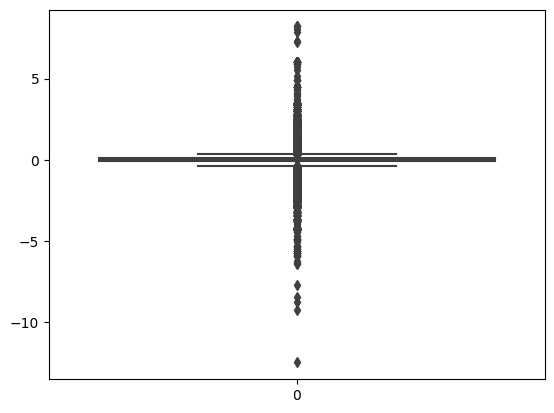

In [171]:
sns.boxplot(df_spd.delta)

<AxesSubplot: >

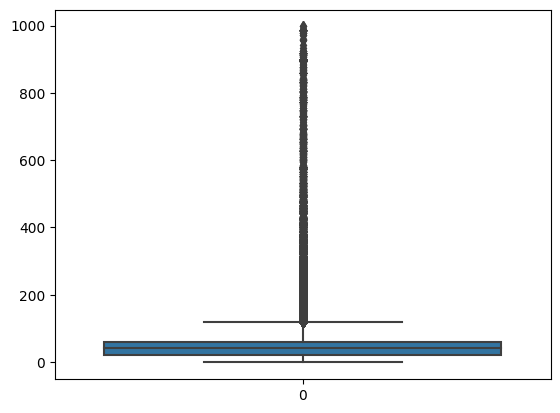

In [173]:
sns.boxplot(df_spd['6lv_spd'])

In [149]:
(df_merge['length_x']/1000)/(df_merge['timedelta']/3600)

0          28.516500
1          10.140882
2          39.886909
3          25.295143
4          14.958000
             ...    
6066570    24.472800
6066571    73.980000
6066572          inf
6066573    14.986286
6066574    21.439800
Length: 6066575, dtype: float64

In [152]:
df_merge.speed

0          27.38
1           9.90
2          39.25
3          22.89
4          13.14
           ...  
6066570    20.54
6066571    -1.00
6066572    -1.00
6066573    13.99
6066574    20.75
Name: speed, Length: 6066575, dtype: float64

In [180]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6066575 entries, 0 to 6066574
Data columns (total 25 columns):
 #   Column         Dtype         
---  ------         -----         
 0   obu_id         object        
 1   group_id       int64         
 2   veh_type       object        
 3   seq            int64         
 4   datetime       object        
 5   link_id        int64         
 6   from_vlink_id  float64       
 7   v_link_id      int64         
 8   to_vlink_id    float64       
 9   in_time        int64         
 10  out_time       int64         
 11  length_x       float64       
 12  speed          float64       
 13  emd_code       int64         
 14  road_rank_x    int64         
 15  is_nday        int64         
 16  start_nday     int64         
 17  in_datetime    datetime64[ns]
 18  out_datetime   datetime64[ns]
 19  timedelta      float64       
 20  max_speed      int64         
 21  link_type      int64         
 22  length_y       float64       
 23  road_ty

In [192]:
df_merge['from_vlink_id'].apply(np.int64)

0          57170496901
1          57170064001
2          57172526501
3          57170526301
4          57171919401
              ...     
6066570    57174489102
6066571    57174411802
6066572    57174200401
6066573    57174413201
6066574    57174413001
Name: from_vlink_id, Length: 6066575, dtype: int64

In [193]:
df_merge['from_vlink_id'] = df_merge['from_vlink_id'].apply(np.int64)
df_merge['to_vlink_id'] = df_merge['to_vlink_id'].apply(np.int64)

In [195]:
df_merge.columns

Index(['obu_id', 'group_id', 'veh_type', 'seq', 'datetime', 'link_id',
       'from_vlink_id', 'v_link_id', 'to_vlink_id', 'in_time', 'out_time',
       'length_x', 'speed', 'emd_code', 'road_rank_x', 'is_nday', 'start_nday',
       'in_datetime', 'out_datetime', 'timedelta', 'max_speed', 'link_type',
       'length_y', 'road_type', 'road_rank_y'],
      dtype='object')

In [202]:
df_merge.insert(11, 'our_speed', (df_merge['length_x']/1000)/(df_merge['timedelta']/3600))
df_merge


,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,is_nday,start_nday,in_datetime,out_datetime,timedelta,max_speed,link_type,length_y,road_type,road_rank_y
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,57170496901,57170064001,57172526501,208,...,0,0,2021-01-18 00:02:08,2021-01-18 00:02:16,8.00,60,32768,0.06,0,104
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,57170064001,57172526501,57170526301,217,...,0,0,2021-01-18 00:02:17,2021-01-18 00:03:25,68.00,60,32768,0.19,0,104
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,57172526501,57170526301,57171919401,326,...,0,0,2021-01-18 00:03:26,2021-01-18 00:03:59,33.00,60,32768,0.37,0,104
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,57170526301,57171919401,57171265801,400,...,0,0,2021-01-18 00:04:00,2021-01-18 00:04:14,14.00,60,32768,0.10,0,104
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,57171919401,57171265801,57171265902,415,...,0,0,2021-01-18 00:04:15,2021-01-18 00:04:21,6.00,60,4,0.03,0,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,57174489102,57174411802,57174200401,235912,...,0,0,2021-01-18 23:59:12,2021-01-18 23:59:17,5.00,60,32768,0.03,0,104
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,57174411802,57174200401,57174413201,235918,...,0,0,2021-01-18 23:59:18,2021-01-18 23:59:19,1.00,60,4,0.02,0,104
6066572,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,571744132,57174200401,57174413201,57174413001,235919,...,0,0,2021-01-18 23:59:19,2021-01-18 23:59:19,0.00,60,4,0.01,0,104
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,57174413201,57174413001,57171708502,235920,...,0,0,2021-01-18 23:59:20,2021-01-18 23:59:34,14.00,0,4,0.06,0,104


In [201]:
df_merge.drop('our_speed', axis=1, inplace=True)

In [205]:
df_merge[df_merge['our_speed'] > 1000] = -1
df_merge.our_speed

0         28.52
1         10.14
2         39.89
3         25.30
4         14.96
           ... 
6066570   24.47
6066571   73.98
6066572   -1.00
6066573   14.99
6066574   21.44
Name: our_speed, Length: 6066575, dtype: float64

'obu_id', 'group_id', 'veh_type', 'seq', 'datetime', 'link_id',
       'from_vlink_id', 'v_link_id', 'to_vlink_id', 'in_time', 'out_time',
       'length_x', 'speed', 'emd_code', 'road_rank_x', 'is_nday', 'start_nday',
       'in_datetime', 'out_datetime', 'timedelta', 'max_speed', 'link_type',
       'length_y', 'road_type', 'road_rank_y'

In [209]:
df_merge.link_type.unique()

array([32768,     4,    -1,     1,     8,    32,     2,   516, 33280,
          64, 34816,   513,  2052,   128,    16,   544], dtype=int64)

In [210]:
df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,speed,emd_code,road_rank_x,in_datetime,out_datetime,max_speed,link_type,length_y,road_type,road_rank_y
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,57170496901,57170064001,57172526501,208,...,27.38,1102060,104,2021-01-18 00:02:08,2021-01-18 00:02:16,60,32768,0.06,0,104
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,57170064001,57172526501,57170526301,217,...,9.90,1102060,104,2021-01-18 00:02:17,2021-01-18 00:03:25,60,32768,0.19,0,104
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,57172526501,57170526301,57171919401,326,...,39.25,1102059,104,2021-01-18 00:03:26,2021-01-18 00:03:59,60,32768,0.37,0,104
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,57170526301,57171919401,57171265801,400,...,22.89,1102059,104,2021-01-18 00:04:00,2021-01-18 00:04:14,60,32768,0.10,0,104
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,57171919401,57171265801,57171265902,415,...,13.14,1102059,104,2021-01-18 00:04:15,2021-01-18 00:04:21,60,4,0.03,0,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,57174489102,57174411802,57174200401,235912,...,20.54,1101063,104,2021-01-18 23:59:12,2021-01-18 23:59:17,60,32768,0.03,0,104
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,57174411802,57174200401,57174413201,235918,...,-1.00,1101063,104,2021-01-18 23:59:18,2021-01-18 23:59:19,60,4,0.02,0,104
6066572,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.00,-1,-1,-1,-1,-1,-1,-1.00,-1,-1
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,57174413201,57174413001,57171708502,235920,...,13.99,1101063,104,2021-01-18 23:59:20,2021-01-18 23:59:34,0,4,0.06,0,104


In [215]:
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]

In [217]:
df_merge['ETA15'] = df_merge['in_datetime'].apply(round_to_quarter_hour)

In [218]:
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,emd_code,road_rank_x,in_datetime,out_datetime,max_speed,link_type,length_y,road_type,road_rank_y,ETA15
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,57170496901,57170064001,57172526501,208,...,1102060,104,2021-01-18 00:02:08,2021-01-18 00:02:16,60,32768,0.06,0,104,2021-01-18 00:00:00
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,57170064001,57172526501,57170526301,217,...,1102060,104,2021-01-18 00:02:17,2021-01-18 00:03:25,60,32768,0.19,0,104,2021-01-18 00:00:00
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,57172526501,57170526301,57171919401,326,...,1102059,104,2021-01-18 00:03:26,2021-01-18 00:03:59,60,32768,0.37,0,104,2021-01-18 00:00:00
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,57170526301,57171919401,57171265801,400,...,1102059,104,2021-01-18 00:04:00,2021-01-18 00:04:14,60,32768,0.10,0,104,2021-01-18 00:00:00
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,57171919401,57171265801,57171265902,415,...,1102059,104,2021-01-18 00:04:15,2021-01-18 00:04:21,60,4,0.03,0,104,2021-01-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066569,108620210118235627649S00,1,TM,25,2021-01-18 23:59:07,571744891,57174489001,57174489102,57174411802,235907,...,1101063,104,2021-01-18 23:59:07,2021-01-18 23:59:11,60,4,0.03,0,104,2021-01-18 23:45:00
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,57174489102,57174411802,57174200401,235912,...,1101063,104,2021-01-18 23:59:12,2021-01-18 23:59:17,60,32768,0.03,0,104,2021-01-18 23:45:00
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,57174411802,57174200401,57174413201,235918,...,1101063,104,2021-01-18 23:59:18,2021-01-18 23:59:19,60,4,0.02,0,104,2021-01-18 23:45:00
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,57174413201,57174413001,57171708502,235920,...,1101063,104,2021-01-18 23:59:20,2021-01-18 23:59:34,0,4,0.06,0,104,2021-01-18 23:45:00


In [221]:
def intime_datetunning(col):
    time = str(col[0]).zfill(6)
    if col[1] == 1:
        date = '2021-01-19 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    else:
        date = '2021-01-18 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    return date

def outtime_datetunning(col):
    time = str(col[0]).zfill(6)
    if (col[1] == 1) or (col[2] == 1):
        date = '2021-01-19 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    else:
        date = '2021-01-18 ' + time[:2] + ':' + time[2:4] + ':' + time[4:]
    return date

def change_timedelta_second(data):
    return data.total_seconds()

def round_to_quarter_hour(dt):
    # 분을 15분 단위로 조정
    minute = (dt.minute // 15) * 15
    return dt.replace(minute=minute, second=0, microsecond=0)


In [219]:
df = pd.read_csv('H:/새 폴더/TM_P1_20210118_hy.csv')
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104
...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103


In [220]:
is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= '2021-01-19 00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,length,speed,emd_code,road_rank,is_nday,start_nday
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,58.44,4.21,1102060,104,0,0
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,63.37,27.38,1102060,104,0,0
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,191.55,9.90,1102060,104,0,0
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,365.63,39.25,1102059,104,0,0
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,98.37,22.89,1102059,104,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,20.55,-1.00,1101063,104,0,0
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,7.00,-1.00,1101063,104,0,0
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,58.28,13.99,1101063,104,0,0
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,119.11,20.75,1101067,103,0,0


In [222]:
df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,2021-01-18 00:01:19,2021-01-18 00:02:07,58.44,4.21,1102060,104,0,0
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,2021-01-18 23:59:35,2021-01-18 23:59:55,119.11,20.75,1101067,103,0,0


In [223]:
df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,2021-01-18 00:01:19,2021-01-18 00:02:07,58.44,4.21,1102060,104,0,0
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,2021-01-18 23:59:35,2021-01-18 23:59:55,119.11,20.75,1101067,103,0,0


In [224]:
delta = df.out_datetime - df.in_datetime
df['timedelta'] = delta.apply(change_timedelta_second)
df

,obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday,timedelta
0,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,2021-01-18 00:01:19,2021-01-18 00:02:07,58.44,4.21,1102060,104,0,0,48.00
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0,8.00
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0,68.00
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0,33.00
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0,1.00
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0,0.00
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0,14.00
6220831,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,2021-01-18 23:59:35,2021-01-18 23:59:55,119.11,20.75,1101067,103,0,0,20.00


In [225]:
df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df

,from_obu_id,obu_id,to_obu_id,group_id,veh_type,seq,datetime,v_link_id,in_time,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday,timedelta
0,None,105020210118000048249S00,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,57170496901,119,207,2021-01-18 00:01:19,2021-01-18 00:02:07,58.44,4.21,1102060,104,0,0,48.00
1,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,57170064001,208,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0,8.00
2,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,57172526501,217,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0,68.00
3,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,57170526301,326,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0,33.00
4,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,57171919401,400,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,57174200401,235918,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0,1.00
6220829,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,57174413201,235919,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0,0.00
6220830,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,57174413001,235920,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0,14.00
6220831,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,57171708502,235935,235955,2021-01-18 23:59:35,2021-01-18 23:59:55,119.11,20.75,1101067,103,0,0,20.00


In [226]:
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df

,from_obu_id,obu_id,to_obu_id,group_id,veh_type,seq,datetime,from_vlink_id,v_link_id,to_vlink_id,...,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday,timedelta
0,None,105020210118000048249S00,105020210118000048249S00,1,TM,1,2021-01-18 00:01:19,NaN,57170496901,"57,170,064,001.00",...,207,2021-01-18 00:01:19,2021-01-18 00:02:07,58.44,4.21,1102060,104,0,0,48.00
1,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,"57,170,496,901.00",57170064001,"57,172,526,501.00",...,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0,8.00
2,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,"57,170,064,001.00",57172526501,"57,170,526,301.00",...,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0,68.00
3,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,"57,172,526,501.00",57170526301,"57,171,919,401.00",...,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0,33.00
4,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,"57,170,526,301.00",57171919401,"57,171,265,801.00",...,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220828,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,"57,174,411,802.00",57174200401,"57,174,413,201.00",...,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0,1.00
6220829,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,"57,174,200,401.00",57174413201,"57,174,413,001.00",...,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0,0.00
6220830,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,"57,174,413,201.00",57174413001,"57,171,708,502.00",...,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0,14.00
6220831,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,30,2021-01-18 23:59:35,"57,174,413,001.00",57171708502,"57,173,993,201.00",...,235955,2021-01-18 23:59:35,2021-01-18 23:59:55,119.11,20.75,1101067,103,0,0,20.00


In [239]:
df_merge['from_vlink_id'] = df_merge['from_vlink_id'].apply(np.int64)
df_merge['to_vlink_id'] = df_merge['to_vlink_id'].apply(np.int64)
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,out_datetime,ETA15,length,our_speed,speed,emd_code,road_rank,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,57170496901,57170064001,57172526501,208,...,2021-01-18 00:02:16,2021-01-18 00:00:00,63.37,28.52,27.38,1102060,104,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,57170064001,57172526501,57170526301,217,...,2021-01-18 00:03:25,2021-01-18 00:00:00,191.55,10.14,9.90,1102060,104,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,57172526501,57170526301,57171919401,326,...,2021-01-18 00:03:59,2021-01-18 00:00:00,365.63,39.89,39.25,1102059,104,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,57170526301,57171919401,57171265801,400,...,2021-01-18 00:04:14,2021-01-18 00:00:00,98.37,25.30,22.89,1102059,104,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,57171919401,57171265801,57171265902,415,...,2021-01-18 00:04:21,2021-01-18 00:00:00,24.93,14.96,13.14,1102059,104,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066569,108620210118235627649S00,1,TM,25,2021-01-18 23:59:07,571744891,57174489001,57174489102,57174411802,235907,...,2021-01-18 23:59:11,2021-01-18 23:45:00,31.92,28.73,20.65,1101063,104,60,4,0
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,57174489102,57174411802,57174200401,235912,...,2021-01-18 23:59:17,2021-01-18 23:45:00,33.99,24.47,20.54,1101063,104,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,57174411802,57174200401,57174413201,235918,...,2021-01-18 23:59:19,2021-01-18 23:45:00,20.55,73.98,-1.00,1101063,104,60,4,0
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,57174413201,57174413001,57171708502,235920,...,2021-01-18 23:59:34,2021-01-18 23:45:00,58.28,14.99,13.99,1101063,104,0,4,0


In [227]:
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path

,from_obu_id,obu_id,to_obu_id,group_id,veh_type,seq,datetime,from_vlink_id,v_link_id,to_vlink_id,...,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday,timedelta
1,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,"57,170,496,901.00",57170064001,"57,172,526,501.00",...,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0,8.00
2,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,"57,170,064,001.00",57172526501,"57,170,526,301.00",...,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0,68.00
3,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,"57,172,526,501.00",57170526301,"57,171,919,401.00",...,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0,33.00
4,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,"57,170,526,301.00",57171919401,"57,171,265,801.00",...,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0,14.00
5,105020210118000048249S00,105020210118000048249S00,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,"57,171,919,401.00",57171265801,"57,171,265,902.00",...,421,2021-01-18 00:04:15,2021-01-18 00:04:21,24.93,13.14,1102059,104,0,0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220827,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,"57,174,489,102.00",57174411802,"57,174,200,401.00",...,235917,2021-01-18 23:59:12,2021-01-18 23:59:17,33.99,20.54,1101063,104,0,0,5.00
6220828,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,"57,174,411,802.00",57174200401,"57,174,413,201.00",...,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0,1.00
6220829,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,"57,174,200,401.00",57174413201,"57,174,413,001.00",...,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0,0.00
6220830,108620210118235627649S00,108620210118235627649S00,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,"57,174,413,201.00",57174413001,"57,171,708,502.00",...,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0,14.00


In [228]:
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
df_path

C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\4171320285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


,obu_id,group_id,veh_type,seq,datetime,from_vlink_id,v_link_id,to_vlink_id,in_time,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday,timedelta
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0,8.00
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0,68.00
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0,33.00
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0,14.00
5,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,421,2021-01-18 00:04:15,2021-01-18 00:04:21,24.93,13.14,1102059,104,0,0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220827,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,235917,2021-01-18 23:59:12,2021-01-18 23:59:17,33.99,20.54,1101063,104,0,0,5.00
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0,1.00
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,"57,174,200,401.00",57174413201,"57,174,413,001.00",235919,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0,0.00
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0,14.00


In [229]:
df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_path

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,out_time,in_datetime,out_datetime,length,speed,emd_code,road_rank,is_nday,start_nday,timedelta
1,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,216,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,27.38,1102060,104,0,0,8.00
2,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,325,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,9.90,1102060,104,0,0,68.00
3,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,359,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.25,1102059,104,0,0,33.00
4,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,414,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,22.89,1102059,104,0,0,14.00
5,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,421,2021-01-18 00:04:15,2021-01-18 00:04:21,24.93,13.14,1102059,104,0,0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220827,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,235917,2021-01-18 23:59:12,2021-01-18 23:59:17,33.99,20.54,1101063,104,0,0,5.00
6220828,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,235919,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,-1.00,1101063,104,0,0,1.00
6220829,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,571744132,"57,174,200,401.00",57174413201,"57,174,413,001.00",235919,235919,2021-01-18 23:59:19,2021-01-18 23:59:19,7.00,-1.00,1101063,104,0,0,0.00
6220830,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,235934,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,13.99,1101063,104,0,0,14.00


In [230]:
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,length,speed,emd_code,road_rank,is_nday,start_nday,timedelta,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,...,63.37,27.38,1102060,104,0,0,8.00,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,...,191.55,9.90,1102060,104,0,0,68.00,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,...,365.63,39.25,1102059,104,0,0,33.00,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,...,98.37,22.89,1102059,104,0,0,14.00,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,...,24.93,13.14,1102059,104,0,0,6.00,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,...,33.99,20.54,1101063,104,0,0,5.00,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,...,20.55,-1.00,1101063,104,0,0,1.00,60,4,0
6066572,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,571744132,"57,174,200,401.00",57174413201,"57,174,413,001.00",235919,...,7.00,-1.00,1101063,104,0,0,0.00,60,4,0
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,...,58.28,13.99,1101063,104,0,0,14.00,0,4,0


In [231]:
df_merge.columns

Index(['obu_id', 'group_id', 'veh_type', 'seq', 'datetime', 'link_id',
       'from_vlink_id', 'v_link_id', 'to_vlink_id', 'in_time', 'out_time',
       'in_datetime', 'out_datetime', 'length', 'speed', 'emd_code',
       'road_rank', 'is_nday', 'start_nday', 'timedelta', 'max_speed',
       'link_type', 'road_type'],
      dtype='object')

In [233]:
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,our_speed,speed,emd_code,road_rank,is_nday,start_nday,timedelta,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,...,28.52,27.38,1102060,104,0,0,8.00,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,...,10.14,9.90,1102060,104,0,0,68.00,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,...,39.89,39.25,1102059,104,0,0,33.00,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,...,25.30,22.89,1102059,104,0,0,14.00,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,...,14.96,13.14,1102059,104,0,0,6.00,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,...,24.47,20.54,1101063,104,0,0,5.00,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,...,73.98,-1.00,1101063,104,0,0,1.00,60,4,0
6066572,108620210118235627649S00,1,TM,28,2021-01-18 23:59:19,571744132,"57,174,200,401.00",57174413201,"57,174,413,001.00",235919,...,inf,-1.00,1101063,104,0,0,0.00,60,4,0
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,...,14.99,13.99,1101063,104,0,0,14.00,0,4,0


In [234]:
df_merge[df_merge['our_speed'] > 1000] = -1
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,our_speed,speed,emd_code,road_rank,is_nday,start_nday,timedelta,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,...,28.52,27.38,1102060,104,0,0,8.00,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,...,10.14,9.90,1102060,104,0,0,68.00,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,...,39.89,39.25,1102059,104,0,0,33.00,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,...,25.30,22.89,1102059,104,0,0,14.00,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,...,14.96,13.14,1102059,104,0,0,6.00,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,...,24.47,20.54,1101063,104,0,0,5.00,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,...,73.98,-1.00,1101063,104,0,0,1.00,60,4,0
6066572,-1,-1,-1,-1,-1,-1,-1.00,-1,-1.00,-1,...,-1.00,-1.00,-1,-1,-1,-1,-1.00,-1,-1,-1
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,...,14.99,13.99,1101063,104,0,0,14.00,0,4,0


In [235]:
df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,in_datetime,out_datetime,length,our_speed,speed,emd_code,road_rank,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,...,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,28.52,27.38,1102060,104,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,...,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,10.14,9.90,1102060,104,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,...,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.89,39.25,1102059,104,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,...,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,25.30,22.89,1102059,104,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,...,2021-01-18 00:04:15,2021-01-18 00:04:21,24.93,14.96,13.14,1102059,104,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,...,2021-01-18 23:59:12,2021-01-18 23:59:17,33.99,24.47,20.54,1101063,104,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,...,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,73.98,-1.00,1101063,104,60,4,0
6066572,-1,-1,-1,-1,-1,-1,-1.00,-1,-1.00,-1,...,-1,-1,-1.00,-1.00,-1.00,-1,-1,-1,-1,-1
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,...,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,14.99,13.99,1101063,104,0,4,0


In [236]:
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,in_datetime,out_datetime,length,our_speed,speed,emd_code,road_rank,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,...,2021-01-18 00:02:08,2021-01-18 00:02:16,63.37,28.52,27.38,1102060,104,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,...,2021-01-18 00:02:17,2021-01-18 00:03:25,191.55,10.14,9.90,1102060,104,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,...,2021-01-18 00:03:26,2021-01-18 00:03:59,365.63,39.89,39.25,1102059,104,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,...,2021-01-18 00:04:00,2021-01-18 00:04:14,98.37,25.30,22.89,1102059,104,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,...,2021-01-18 00:04:15,2021-01-18 00:04:21,24.93,14.96,13.14,1102059,104,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066569,108620210118235627649S00,1,TM,25,2021-01-18 23:59:07,571744891,"57,174,489,001.00",57174489102,"57,174,411,802.00",235907,...,2021-01-18 23:59:07,2021-01-18 23:59:11,31.92,28.73,20.65,1101063,104,60,4,0
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,...,2021-01-18 23:59:12,2021-01-18 23:59:17,33.99,24.47,20.54,1101063,104,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,...,2021-01-18 23:59:18,2021-01-18 23:59:19,20.55,73.98,-1.00,1101063,104,60,4,0
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,...,2021-01-18 23:59:20,2021-01-18 23:59:34,58.28,14.99,13.99,1101063,104,0,4,0


In [237]:
df_merge.columns

Index(['obu_id', 'group_id', 'veh_type', 'seq', 'datetime', 'link_id',
       'from_vlink_id', 'v_link_id', 'to_vlink_id', 'in_time', 'out_time',
       'in_datetime', 'out_datetime', 'length', 'our_speed', 'speed',
       'emd_code', 'road_rank', 'max_speed', 'link_type', 'road_type'],
      dtype='object')

In [238]:
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,out_datetime,ETA15,length,our_speed,speed,emd_code,road_rank,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,"57,170,496,901.00",57170064001,"57,172,526,501.00",208,...,2021-01-18 00:02:16,2021-01-18 00:00:00,63.37,28.52,27.38,1102060,104,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,"57,170,064,001.00",57172526501,"57,170,526,301.00",217,...,2021-01-18 00:03:25,2021-01-18 00:00:00,191.55,10.14,9.90,1102060,104,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,"57,172,526,501.00",57170526301,"57,171,919,401.00",326,...,2021-01-18 00:03:59,2021-01-18 00:00:00,365.63,39.89,39.25,1102059,104,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,"57,170,526,301.00",57171919401,"57,171,265,801.00",400,...,2021-01-18 00:04:14,2021-01-18 00:00:00,98.37,25.30,22.89,1102059,104,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,"57,171,919,401.00",57171265801,"57,171,265,902.00",415,...,2021-01-18 00:04:21,2021-01-18 00:00:00,24.93,14.96,13.14,1102059,104,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066569,108620210118235627649S00,1,TM,25,2021-01-18 23:59:07,571744891,"57,174,489,001.00",57174489102,"57,174,411,802.00",235907,...,2021-01-18 23:59:11,2021-01-18 23:45:00,31.92,28.73,20.65,1101063,104,60,4,0
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,"57,174,489,102.00",57174411802,"57,174,200,401.00",235912,...,2021-01-18 23:59:17,2021-01-18 23:45:00,33.99,24.47,20.54,1101063,104,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,"57,174,411,802.00",57174200401,"57,174,413,201.00",235918,...,2021-01-18 23:59:19,2021-01-18 23:45:00,20.55,73.98,-1.00,1101063,104,60,4,0
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,"57,174,413,201.00",57174413001,"57,171,708,502.00",235920,...,2021-01-18 23:59:34,2021-01-18 23:45:00,58.28,14.99,13.99,1101063,104,0,4,0


In [240]:
df_merge

,obu_id,group_id,veh_type,seq,datetime,link_id,from_vlink_id,v_link_id,to_vlink_id,in_time,...,out_datetime,ETA15,length,our_speed,speed,emd_code,road_rank,max_speed,link_type,road_type
0,105020210118000048249S00,1,TM,2,2021-01-18 00:02:08,571700640,57170496901,57170064001,57172526501,208,...,2021-01-18 00:02:16,2021-01-18 00:00:00,63.37,28.52,27.38,1102060,104,60,32768,0
1,105020210118000048249S00,1,TM,3,2021-01-18 00:02:17,571725265,57170064001,57172526501,57170526301,217,...,2021-01-18 00:03:25,2021-01-18 00:00:00,191.55,10.14,9.90,1102060,104,60,32768,0
2,105020210118000048249S00,1,TM,4,2021-01-18 00:03:26,571705263,57172526501,57170526301,57171919401,326,...,2021-01-18 00:03:59,2021-01-18 00:00:00,365.63,39.89,39.25,1102059,104,60,32768,0
3,105020210118000048249S00,1,TM,5,2021-01-18 00:04:00,571719194,57170526301,57171919401,57171265801,400,...,2021-01-18 00:04:14,2021-01-18 00:00:00,98.37,25.30,22.89,1102059,104,60,32768,0
4,105020210118000048249S00,1,TM,6,2021-01-18 00:04:15,571712658,57171919401,57171265801,57171265902,415,...,2021-01-18 00:04:21,2021-01-18 00:00:00,24.93,14.96,13.14,1102059,104,60,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066569,108620210118235627649S00,1,TM,25,2021-01-18 23:59:07,571744891,57174489001,57174489102,57174411802,235907,...,2021-01-18 23:59:11,2021-01-18 23:45:00,31.92,28.73,20.65,1101063,104,60,4,0
6066570,108620210118235627649S00,1,TM,26,2021-01-18 23:59:12,571744118,57174489102,57174411802,57174200401,235912,...,2021-01-18 23:59:17,2021-01-18 23:45:00,33.99,24.47,20.54,1101063,104,60,32768,0
6066571,108620210118235627649S00,1,TM,27,2021-01-18 23:59:18,571742004,57174411802,57174200401,57174413201,235918,...,2021-01-18 23:59:19,2021-01-18 23:45:00,20.55,73.98,-1.00,1101063,104,60,4,0
6066573,108620210118235627649S00,1,TM,29,2021-01-18 23:59:20,571744130,57174413201,57174413001,57171708502,235920,...,2021-01-18 23:59:34,2021-01-18 23:45:00,58.28,14.99,13.99,1101063,104,0,4,0


In [242]:
df_merge.to_csv(root + 'preprocessed/TM_P1_20210118_hy_ETA15.csv')

In [267]:
root = 'J:/tmaplink2021/전처리/'
filename = 'TM_P1_20210425_hy.csv'
today = '2021-04-25 '
tomorrow = '2021-04-26 '

def intime_datetunning(col):
    time = str(col[0]).zfill(6)
    if col[1] == 1:
        date = tomorrow + time[:2] + ':' + time[2:4] + ':' + time[4:]
    else:
        date = today + time[:2] + ':' + time[2:4] + ':' + time[4:]
    return date

def outtime_datetunning(col):
    time = str(col[0]).zfill(6)
    if (col[1] == 1) or (col[2] == 1):
        date = tomorrow + time[:2] + ':' + time[2:4] + ':' + time[4:]
    else:
        date = today + time[:2] + ':' + time[2:4] + ':' + time[4:]
    return date

def change_timedelta_second(data):
    return data.total_seconds()

def round_to_quarter_hour(dt):
    # 분을 15분 단위로 조정
    minute = (dt.minute // 15) * 15
    return dt.replace(minute=minute, second=0, microsecond=0)


df = pd.read_csv(root + filename)
print('data reading finish')

is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= tomorrow + '00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday

df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
print('changing in(out)time to in(out)datetime')

df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df = df[df['from_vlink_id']>=0]
df = df[df['to_vlink_id']>=0]
df['from_vlink_id'] = df['from_vlink_id'].apply(np.int64)
df['to_vlink_id'] = df['to_vlink_id'].apply(np.int64)
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
print('making path')

df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
print('merging tmap and level 6 network')

delta = df_merge.out_datetime - df_merge.in_datetime
df_merge['timedelta'] = delta.apply(change_timedelta_second)
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge[df_merge['our_speed'] > 1000] = -1
print('calculating our speed and deleting outlier')

df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
print('rounding 15 minutes and be going to make csv file')

df_merge.to_csv(root + filename[:-4] + '_ETA15.csv', index=False)


# =========================================================

root = 'J:/tmaplink2021/전처리/'
filename = 'TM_P1_20210419_hy.csv'
today = '2021-04-19 '
tomorrow = '2021-04-20 '


df = pd.read_csv(root + filename)
print('data reading finish')

is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= tomorrow + '00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday

df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
print('changing in(out)time to in(out)datetime')

df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df = df[df['from_vlink_id']>=0]
df = df[df['to_vlink_id']>=0]
df['from_vlink_id'] = df['from_vlink_id'].apply(np.int64)
df['to_vlink_id'] = df['to_vlink_id'].apply(np.int64)
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
print('making path')

df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
print('merging tmap and level 6 network')

delta = df_merge.out_datetime - df_merge.in_datetime
df_merge['timedelta'] = delta.apply(change_timedelta_second)
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge[df_merge['our_speed'] > 1000] = -1
print('calculating our speed and deleting outlier')

df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
print('rounding 15 minutes and be going to make csv file')

df_merge.to_csv(root + filename[:-4] + '_ETA15.csv', index=False)


# =========================================================

root = 'J:/tmaplink2021/전처리/'
filename = 'TM_P1_20210420_hy.csv'
today = '2021-04-20 '
tomorrow = '2021-04-21 '


df = pd.read_csv(root + filename)
print('data reading finish')

is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= tomorrow + '00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday

df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
print('changing in(out)time to in(out)datetime')

df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df = df[df['from_vlink_id']>=0]
df = df[df['to_vlink_id']>=0]
df['from_vlink_id'] = df['from_vlink_id'].apply(np.int64)
df['to_vlink_id'] = df['to_vlink_id'].apply(np.int64)
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
print('making path')

df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
print('merging tmap and level 6 network')

delta = df_merge.out_datetime - df_merge.in_datetime
df_merge['timedelta'] = delta.apply(change_timedelta_second)
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge[df_merge['our_speed'] > 1000] = -1
print('calculating our speed and deleting outlier')

df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
print('rounding 15 minutes and be going to make csv file')

df_merge.to_csv(root + filename[:-4] + '_ETA15.csv', index=False)

# =========================================================

root = 'J:/tmaplink2021/전처리/'
filename = 'TM_P1_20210421_hy.csv'
today = '2021-04-21 '
tomorrow = '2021-04-22 '


df = pd.read_csv(root + filename)
print('data reading finish')

is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= tomorrow + '00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday

df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
print('changing in(out)time to in(out)datetime')

df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df = df[df['from_vlink_id']>=0]
df = df[df['to_vlink_id']>=0]
df['from_vlink_id'] = df['from_vlink_id'].apply(np.int64)
df['to_vlink_id'] = df['to_vlink_id'].apply(np.int64)
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
print('making path')

df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
print('merging tmap and level 6 network')

delta = df_merge.out_datetime - df_merge.in_datetime
df_merge['timedelta'] = delta.apply(change_timedelta_second)
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge[df_merge['our_speed'] > 1000] = -1
print('calculating our speed and deleting outlier')

df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
print('rounding 15 minutes and be going to make csv file')

df_merge.to_csv(root + filename[:-4] + '_ETA15.csv', index=False)

# =========================================================

root = 'J:/tmaplink2021/전처리/'
filename = 'TM_P1_20210422_hy.csv'
today = '2021-04-22 '
tomorrow = '2021-04-23 '


df = pd.read_csv(root + filename)
print('data reading finish')

is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= tomorrow + '00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday

df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
print('changing in(out)time to in(out)datetime')

df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df = df[df['from_vlink_id']>=0]
df = df[df['to_vlink_id']>=0]
df['from_vlink_id'] = df['from_vlink_id'].apply(np.int64)
df['to_vlink_id'] = df['to_vlink_id'].apply(np.int64)
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
print('making path')

df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
print('merging tmap and level 6 network')

delta = df_merge.out_datetime - df_merge.in_datetime
df_merge['timedelta'] = delta.apply(change_timedelta_second)
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge[df_merge['our_speed'] > 1000] = -1
print('calculating our speed and deleting outlier')

df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
print('rounding 15 minutes and be going to make csv file')

df_merge.to_csv(root + filename[:-4] + '_ETA15.csv', index=False)

# =========================================================

root = 'J:/tmaplink2021/전처리/'
filename = 'TM_P1_20210423_hy.csv'
today = '2021-04-23 '
tomorrow = '2021-04-24 '


df = pd.read_csv(root + filename)
print('data reading finish')

is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= tomorrow + '00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday

df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
print('changing in(out)time to in(out)datetime')

df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df = df[df['from_vlink_id']>=0]
df = df[df['to_vlink_id']>=0]
df['from_vlink_id'] = df['from_vlink_id'].apply(np.int64)
df['to_vlink_id'] = df['to_vlink_id'].apply(np.int64)
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
print('making path')

df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
print('merging tmap and level 6 network')

delta = df_merge.out_datetime - df_merge.in_datetime
df_merge['timedelta'] = delta.apply(change_timedelta_second)
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge[df_merge['our_speed'] > 1000] = -1
print('calculating our speed and deleting outlier')

df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
print('rounding 15 minutes and be going to make csv file')

df_merge.to_csv(root + filename[:-4] + '_ETA15.csv', index=False)

# =========================================================

root = 'J:/tmaplink2021/전처리/'
filename = 'TM_P1_20210424_hy.csv'
today = '2021-04-24 '
tomorrow = '2021-04-25 '


df = pd.read_csv(root + filename)
print('data reading finish')

is_nday = [1 if o-i < 0 else 0 for o, i in zip(df.out_time,df.in_time)]
start_nday = [1 if x >= tomorrow + '00:00:00' else 0 for x in df.datetime]

df['is_nday'] = is_nday
df['start_nday'] = start_nday

df.insert(8, 'in_datetime', df[['in_time', 'start_nday']].apply(intime_datetunning, axis=1))
df.insert(9, 'out_datetime', df[['out_time', 'start_nday', 'is_nday']].apply(outtime_datetunning, axis=1))

df.in_datetime = pd.to_datetime(df.in_datetime)
df.out_datetime = pd.to_datetime(df.out_datetime)
print('changing in(out)time to in(out)datetime')

df.insert(0,'from_obu_id',df.obu_id.shift(1))
df.insert(2,'to_obu_id',df.obu_id.shift(-1))
df.insert(7,'from_vlink_id',df.v_link_id.shift(1))
df.insert(9,'to_vlink_id',df.v_link_id.shift(-1))
df = df[df['from_vlink_id']>=0]
df = df[df['to_vlink_id']>=0]
df['from_vlink_id'] = df['from_vlink_id'].apply(np.int64)
df['to_vlink_id'] = df['to_vlink_id'].apply(np.int64)
df_path = df[(df.from_obu_id == df.to_obu_id)]
df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)
print('making path')

df_path.insert(5, 'link_id', df_path.v_link_id // 100)
df_merge = pd.merge(left=df_path, right=link[['link_id', 'max_speed', 'link_type', 'road_type']], how="left", on="link_id")
print('merging tmap and level 6 network')

delta = df_merge.out_datetime - df_merge.in_datetime
df_merge['timedelta'] = delta.apply(change_timedelta_second)
df_merge.insert(14, 'our_speed', (df_merge['length']/1000)/(df_merge['timedelta']/3600))
df_merge[df_merge['our_speed'] > 1000] = -1
print('calculating our speed and deleting outlier')

df_merge.drop(['is_nday', 'start_nday', 'timedelta'], axis=1, inplace=True)
df_merge = df_merge[df_merge['in_datetime']!= -1]
df_merge = df_merge[df_merge['out_datetime']!= -1]
df_merge.insert(13, 'ETA15', df_merge['in_datetime'].apply(round_to_quarter_hour))
print('rounding 15 minutes and be going to make csv file')

df_merge.to_csv(root + filename[:-4] + '_ETA15.csv', index=False)

data reading finish
changing in(out)time to in(out)datetime


C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\195945187.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


making path
merging tmap and level 6 network
calculating our speed and deleting outlier
rounding 15 minutes and be going to make csv file
data reading finish
changing in(out)time to in(out)datetime


C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\195945187.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


making path
merging tmap and level 6 network
calculating our speed and deleting outlier
rounding 15 minutes and be going to make csv file
data reading finish
changing in(out)time to in(out)datetime


C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\195945187.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


making path
merging tmap and level 6 network
calculating our speed and deleting outlier
rounding 15 minutes and be going to make csv file
data reading finish
changing in(out)time to in(out)datetime


C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\195945187.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


making path
merging tmap and level 6 network
calculating our speed and deleting outlier
rounding 15 minutes and be going to make csv file
data reading finish
changing in(out)time to in(out)datetime


C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\195945187.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


making path
merging tmap and level 6 network
calculating our speed and deleting outlier
rounding 15 minutes and be going to make csv file
data reading finish
changing in(out)time to in(out)datetime


C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\195945187.py:328: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


making path
merging tmap and level 6 network
calculating our speed and deleting outlier
rounding 15 minutes and be going to make csv file
data reading finish
changing in(out)time to in(out)datetime


C:\Users\hyorim\AppData\Local\Temp\ipykernel_30540\195945187.py:382: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.drop(['from_obu_id', 'to_obu_id'], axis=1, inplace=True)


making path
merging tmap and level 6 network
calculating our speed and deleting outlier
rounding 15 minutes and be going to make csv file


In [285]:
df = pd.read_csv('J:/tmaplink2021/전처리2/TM_P1_20211119_hy_ETA15.csv')
df

,obu_id,group_id,veh_type,seq,link_id,from_vlink_id,datetime,to_vlink_id,v_link_id,in_time,...,ETA15,out_time,our_speed,length,speed,emd_code,road_rank,max_speed,link_type,road_type
0,105920211119001214541S00,1,TM,2,571807894,57181479802,2021-11-19 00:12:21,57180146902,57180789401,1221,...,2021-11-19 00:00:00,1227,52.51,87.52,44.84,1109069,104,60,32768,0
1,105920211119001214541S00,1,TM,3,571801469,57180789401,2021-11-19 00:12:28,57182049001,57180146902,1228,...,2021-11-19 00:00:00,1237,38.65,96.62,36.33,1109069,104,60,32768,0
2,105920211119001214541S00,1,TM,4,571820490,57180146902,2021-11-19 00:12:38,57180146402,57182049001,1238,...,2021-11-19 00:00:00,1258,15.78,87.69,14.88,1109069,104,60,32768,0
3,105920211119001214541S00,1,TM,5,571801464,57182049001,2021-11-19 00:12:59,57180145901,57180146402,1259,...,2021-11-19 00:00:00,1308,41.44,103.59,34.95,1109069,104,60,32768,0
4,105920211119001214541S00,1,TM,6,571801459,57180146402,2021-11-19 00:13:09,57180494402,57180145901,1309,...,2021-11-19 00:00:00,1353,14.19,173.41,14.07,1109069,104,60,32768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10146641,105820211119231900129S00,1,TM,106,571716448,57171626101,2021-11-19 23:44:52,57171644701,57171644801,234452,...,2021-11-19 23:30:00,234458,17.81,29.68,17.05,1102059,104,50,4,0
10146642,105820211119231900129S00,1,TM,107,571716447,57171644801,2021-11-19 23:44:59,57170302001,57171644701,234459,...,2021-11-19 23:30:00,234528,22.75,183.29,22.11,1102069,104,50,1,0
10146643,105820211119231900129S00,1,TM,108,571703020,57171644701,2021-11-19 23:45:29,57170173201,57170302001,234529,...,2021-11-19 23:45:00,235148,3.10,326.56,3.09,1102069,104,50,1,0
10146644,105820211119231900129S00,1,TM,109,571701732,57170302001,2021-11-19 23:51:49,57172429701,57170173201,235149,...,2021-11-19 23:45:00,235150,99.65,27.68,45.43,1102069,104,60,32768,0


In [280]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,obu_id,group_id,veh_type,seq,link_id,from_vlink_id,datetime,to_vlink_id,v_link_id,in_time,...,ETA15,out_time,our_speed,length,speed,emd_code,road_rank,max_speed,link_type,road_type
0,105920211119001214541S00,1,TM,2,571807894,57181479802,2021-11-19 00:12:21,57180146902,57180789401,1221,...,2021-11-19 00:00:00,1227,52.51,87.52,44.84,1109069,104,60,32768,0
1,105920211119001214541S00,1,TM,3,571801469,57180789401,2021-11-19 00:12:28,57182049001,57180146902,1228,...,2021-11-19 00:00:00,1237,38.65,96.62,36.33,1109069,104,60,32768,0
2,105920211119001214541S00,1,TM,4,571820490,57180146902,2021-11-19 00:12:38,57180146402,57182049001,1238,...,2021-11-19 00:00:00,1258,15.78,87.69,14.88,1109069,104,60,32768,0
3,105920211119001214541S00,1,TM,5,571801464,57182049001,2021-11-19 00:12:59,57180145901,57180146402,1259,...,2021-11-19 00:00:00,1308,41.44,103.59,34.95,1109069,104,60,32768,0
4,105920211119001214541S00,1,TM,6,571801459,57180146402,2021-11-19 00:13:09,57180494402,57180145901,1309,...,2021-11-19 00:00:00,1353,14.19,173.41,14.07,1109069,104,60,32768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10146641,105820211119231900129S00,1,TM,106,571716448,57171626101,2021-11-19 23:44:52,57171644701,57171644801,234452,...,2021-11-19 23:30:00,234458,17.81,29.68,17.05,1102059,104,50,4,0
10146642,105820211119231900129S00,1,TM,107,571716447,57171644801,2021-11-19 23:44:59,57170302001,57171644701,234459,...,2021-11-19 23:30:00,234528,22.75,183.29,22.11,1102069,104,50,1,0
10146643,105820211119231900129S00,1,TM,108,571703020,57171644701,2021-11-19 23:45:29,57170173201,57170302001,234529,...,2021-11-19 23:45:00,235148,3.10,326.56,3.09,1102069,104,50,1,0
10146644,105820211119231900129S00,1,TM,109,571701732,57170302001,2021-11-19 23:51:49,57172429701,57170173201,235149,...,2021-11-19 23:45:00,235150,99.65,27.68,45.43,1102069,104,60,32768,0


In [278]:
files = os.listdir('J:/tmaplink2021/전처리/')
files

['TM_P1_20210118_hy.csv',
 'TM_P1_20210118_hy_ETA15.csv',
 'TM_P1_20210119_hy.csv',
 'TM_P1_20210119_hy_ETA15.csv',
 'TM_P1_20210120_hy.csv',
 'TM_P1_20210120_hy_ETA15.csv',
 'TM_P1_20210121_hy.csv',
 'TM_P1_20210121_hy_ETA15.csv',
 'TM_P1_20210122_hy.csv',
 'TM_P1_20210122_hy_ETA15.csv',
 'TM_P1_20210123_hy.csv',
 'TM_P1_20210123_hy_ETA15.csv',
 'TM_P1_20210124_hy.csv',
 'TM_P1_20210124_hy_ETA15.csv',
 'TM_P1_20210419_hy.csv',
 'TM_P1_20210419_hy_ETA15.csv',
 'TM_P1_20210420_hy.csv',
 'TM_P1_20210420_hy_ETA15.csv',
 'TM_P1_20210421_hy.csv',
 'TM_P1_20210421_hy_ETA15.csv',
 'TM_P1_20210422_hy.csv',
 'TM_P1_20210422_hy_ETA15.csv',
 'TM_P1_20210423_hy.csv',
 'TM_P1_20210423_hy_ETA15.csv',
 'TM_P1_20210424_hy.csv',
 'TM_P1_20210424_hy_ETA15.csv',
 'TM_P1_20210425_hy.csv',
 'TM_P1_20210425_hy_ETA15.csv',
 'TM_P1_20210913_hy.csv',
 'TM_P1_20210913_hy_ETA15.csv',
 'TM_P1_20210914_hy.csv',
 'TM_P1_20210914_hy_ETA15.csv',
 'TM_P1_20210915_hy.csv',
 'TM_P1_20210915_hy_ETA15.csv',
 'TM_P1_202109

In [284]:
for file in files:
    df = pd.read_csv('J:/tmaplink2021/전처리/' + file)
    print(file)

    if (len(df.columns)==13) | (len(df.columns)==23):
        df.drop('Unnamed: 0', axis=1, inplace=True)
        df.to_csv('J:/tmaplink2021/전처리2/' + file, index=False)


TM_P1_20210118_hy.csv
TM_P1_20210118_hy_ETA15.csv
TM_P1_20210119_hy.csv
TM_P1_20210119_hy_ETA15.csv
TM_P1_20210120_hy.csv
TM_P1_20210120_hy_ETA15.csv
TM_P1_20210121_hy.csv
TM_P1_20210121_hy_ETA15.csv
TM_P1_20210122_hy.csv
TM_P1_20210122_hy_ETA15.csv
TM_P1_20210123_hy.csv
TM_P1_20210123_hy_ETA15.csv
TM_P1_20210124_hy.csv
TM_P1_20210124_hy_ETA15.csv
TM_P1_20210419_hy.csv
TM_P1_20210419_hy_ETA15.csv
TM_P1_20210420_hy.csv
TM_P1_20210420_hy_ETA15.csv
TM_P1_20210421_hy.csv
TM_P1_20210421_hy_ETA15.csv
TM_P1_20210422_hy.csv
TM_P1_20210422_hy_ETA15.csv
TM_P1_20210423_hy.csv
TM_P1_20210423_hy_ETA15.csv
TM_P1_20210424_hy.csv
TM_P1_20210424_hy_ETA15.csv
TM_P1_20210425_hy.csv
TM_P1_20210425_hy_ETA15.csv
TM_P1_20210913_hy.csv
TM_P1_20210913_hy_ETA15.csv
TM_P1_20210914_hy.csv
TM_P1_20210914_hy_ETA15.csv
TM_P1_20210915_hy.csv
TM_P1_20210915_hy_ETA15.csv
TM_P1_20210916_hy.csv
TM_P1_20210916_hy_ETA15.csv
TM_P1_20210917_hy.csv
TM_P1_20210917_hy_ETA15.csv
TM_P1_20210918_hy.csv
TM_P1_20210918_hy_ETA15.csv
